In [1]:
import pymdp
from pymdp.agent import Agent
import numpy as np

from typing import List

In [2]:
obs = [4] # 00, 01, 10, 11
num_obs_modalities = len(obs)

hidden_states = [4]
num_hidden_state_factors = len(hidden_states)

actions = [0, 1]
num_actions_0 = 2

num_controls = [2]
num_control_factors = len(num_controls)

preferences = [100, 0, 0, 100]

In [84]:
def generate_A(num_obs_modalities: int, obs: List[int], hidden_states: List[int]):
    
    A = pymdp.utils.obj_array(num_obs_modalities)
    A_0 = np.zeros((obs[0], hidden_states[0]))
    np.fill_diagonal(A_0, val=1.0)
    A[0] = A_0
    
    return A

def generate_B(hidden_states: List[int], num_controls: int):
    
    B = pymdp.utils.initialize_empty_B(hidden_states, num_controls)
    B_new = B[0]
    uniform_B = np.full(B[0].shape, 0.25)

#     # B_0[my next state, my current state, my action] = probability of transitioning to next state given current state & action
#     B[0][0, 0, 0] = 0.5
#     B[0][1, 0, 0] = 0.5
#     B[0][0, 1, 0] = 0.5
#     B[0][1, 1, 0] = 0.5

#     B[0][0, 0, 1] = 0.5
#     B[0][1, 0, 1] = 0.5
#     B[0][0, 1, 1] = 0.5
#     B[0][1, 1, 1] = 0.5
    
    
    return uniform_B

def generate_C(num_obs_modalities: int, preferences: List[int]):
    
    C = pymdp.utils.obj_array(num_obs_modalities)
    C_0 = np.array(preferences) # 00 and 11 have high preference
    C[0] = C_0
    
    return C

def generate_D(num_hidden_state_factors: int, state: List = [1, 0, 0, 0]):
    
    D = pymdp.utils.obj_array(num_hidden_state_factors)
    D_0 = np.array(state)
    D[0] = D_0
    
    return D

In [87]:
def generate_agent(
        num_obs_modalities: int,
        num_hidden_state_factors: int,
        obs: List[int], 
        hidden_states: List[int],
        num_controls: int,
        preferences: List[int],
        state: List = [1, 0, 0, 0], 
        policy_len: int = 2
    ):
    
    A = generate_A(num_obs_modalities, obs, hidden_states)
    B = generate_B(hidden_states, num_controls)
    C = generate_C(num_obs_modalities, preferences)
    D = generate_D(num_hidden_state_factors, state)
    
    agent = Agent(A=A, B=B, C=C, D=D, num_controls=num_controls, policy_len=policy_len)
    
    return agent

In [88]:
agent_0 = generate_agent(num_obs_modalities, num_hidden_state_factors, obs, hidden_states, num_controls, preferences)

In [89]:
class SingleDeterministic():
    def __init__(self, init_state=[0, 1], fixed_policy=0):
        self.current_state = init_state
        self.init_state = init_state
        self.fixed_policy = fixed_policy
        self.obs = {"[0, 0]": [0], "[0, 1]": [1], "[1, 0]": [2], "[1, 1]": [3]}
        print(f"Starting at state {self.current_state}, fixed second agent with policy {self.fixed_policy}")

    def step(self, action):
        if action == 0:
            self.current_state = [0, self.fixed_policy]
        if action == 1:
            self.current_state = [1, self.fixed_policy]
        return self.obs[str(self.current_state)]

    def reset(self):
        self.current_state = self.init_state
        self.fixed_policy = self.fixed_policy
        print("Environment reset")
        return self.obs[str(self.current_state)]

env = SingleDeterministic(init_state=[1, 1], fixed_policy=1)

Starting at state [1, 1], fixed second agent with policy 1


Environment reset
Time: 0. Agent receives observation: [3]
belief: [array([5.e-01, 5.e-17, 5.e-17, 5.e-01])]


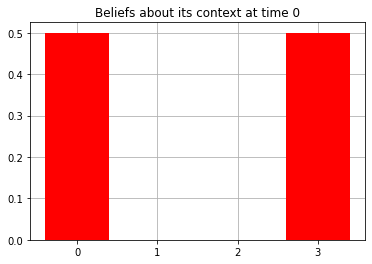

Agent chose action: [0.]
New state: [0, 1]
Time: 1. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


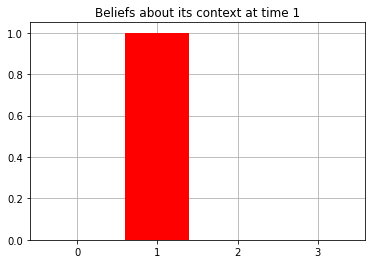

Agent chose action: [0.]
New state: [0, 1]
Time: 2. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


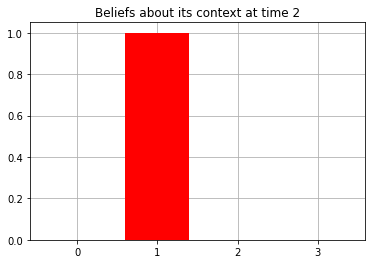

Agent chose action: [0.]
New state: [0, 1]
Time: 3. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


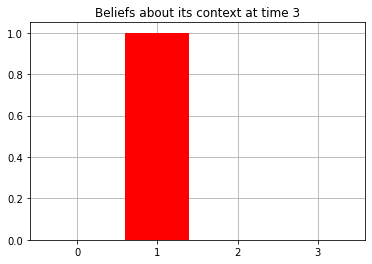

Agent chose action: [0.]
New state: [0, 1]
Time: 4. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


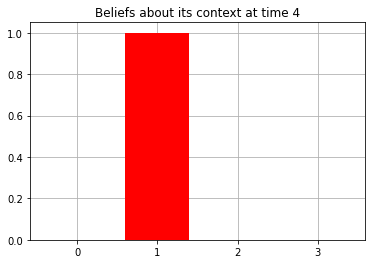

Agent chose action: [0.]
New state: [0, 1]
Time: 5. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


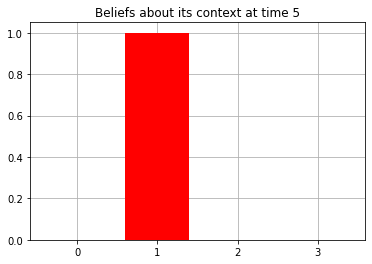

Agent chose action: [0.]
New state: [0, 1]
Time: 6. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


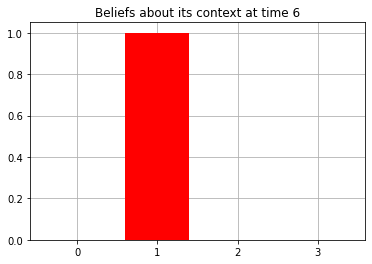

Agent chose action: [0.]
New state: [0, 1]
Time: 7. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


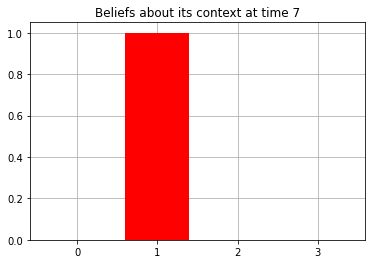

Agent chose action: [0.]
New state: [0, 1]
Time: 8. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


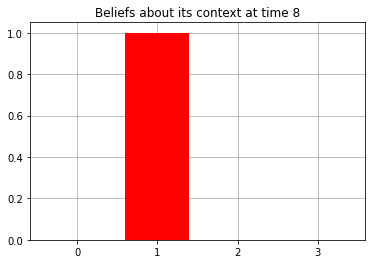

Agent chose action: [0.]
New state: [0, 1]
Time: 9. Agent receives observation: [1]
belief: [array([1.e-16, 1.e+00, 1.e-16, 1.e-16])]


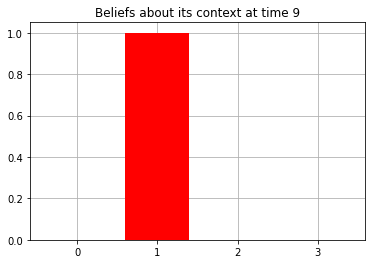

Agent chose action: [0.]
New state: [0, 1]


In [91]:
from utils import plot_beliefs

def actinf_loop(agent, env, T=10):
    obs = env.reset()

    for t in range(T):
        print(f"Time: {t}. Agent receives observation: {obs}")
        qs = agent.infer_states(obs)
        print(f"belief: {qs}")
        plot_beliefs(qs[0], title_str = f"Beliefs about its context at time {t}")
        # plot_beliefs(qs[1], title_str = f"Beliefs about opponent context at time {t}")
        q_pi, efe = agent.infer_policies()
        chosen_action = agent.sample_action()
        print(f"Agent chose action: {chosen_action}") 
        
        obs = env.step(chosen_action[0])
        print(f"New state: {env.current_state}")

actinf_loop(agent_0, env, 10)